<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Regression Analysis**


Estimated time needed: **30** minutes


The goal of regression analysis is to describe the relationship between one set of variables called the dependent variables, and another set of variables, called independent or explanatory variables. When there is only one explanatory variable, it is called simple regression.


## Objectives


After completing this lab you will be able to:


*   Import Libraries
*   Regression analysis in place of the t-test
*   Regression analysis in place of ANOVA
*   Regression analysis in place of correlation


***


## Import Libraries


All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented. If you run this notebook in a different environment, e.g. your desktop, you may need to uncomment and install certain libraries.


In [1]:
#install specific version of libraries used in lab
#! mamba install pandas==1.3.3
#! mamba install numpy=1.21.2
#! mamba install scipy=1.7.1-y
#!  mamba install seaborn=0.9.0-y
#!  mamba install matplotlib=3.4.3-y
#!  mamba install statsmodels=0.12.0-y

Import the libraries we need for the lab


In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

Read in the csv file from the URL using the request library


In [3]:
ratings_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/teachingratings.csv'
ratings_df = pd.read_csv(ratings_url)


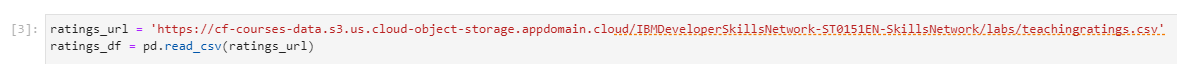## Lab Exercises


In this section, you will learn how to run regression analysis in place of the t-test, ANOVA, and correlation


### Regression with T-test: Using the teachers rating data set, does gender affect teaching evaluation rates?


Initially, we had used the t-test to test if there was a statistical difference in evaluations for males and females, we are now going to use regression. We will state the null hypothesis:

*   $H\_0: β1$ = 0 (Gender has no effect on teaching evaluation scores)
*   $H\_1: β1$ is not equal to 0 (Gender has an effect on teaching evaluation scores)


We will use the female variable. female = 1 and male = 0


In [4]:
## X is the input variables (or independent variables)
X = ratings_df['female']
## y is the target/dependent variable
y = ratings_df['eval']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   eval   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     10.56
Date:                Fri, 03 Jun 2022   Prob (F-statistic):            0.00124
Time:                        03:20:51   Log-Likelihood:                -378.50
No. Observations:                 463   AIC:                             761.0
Df Residuals:                     461   BIC:                             769.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0690      0.034    121.288      0.000       4.003       4.135
female        -0.1680      0.052     -3.250      0.001      -0.270      -0.066
==============================================================================
Omnibus:                       17.625   Durbin-Watson:                   1.209
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.970
Skew:                          -0.496   Prob(JB):                     7.60e-05
Kurtosis:                       2.981   Cond. No.                         2.47
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** Like the t-test, the p-value is less than the alpha (α) level = 0.05, so we reject the null hypothesis as there is evidence that there is a difference in mean evaluation scores based on gender. The coefficient -0.1680 means that females get 0.168 scores less than men.


### Regression with ANOVA: Using the teachers' rating data set, does beauty  score for instructors  differ by age?


State the Hypothesis:

*   $H\_0: µ1 = µ2 = µ3$ (the three population means are equal)
*   $H\_1:$ At least one of the means differ


Then we group the data like we did with ANOVA


In [5]:
ratings_df.loc[(ratings_df['age'] <= 40), 'age_group'] = '40 years and younger'
ratings_df.loc[(ratings_df['age'] > 40)&(ratings_df['age'] < 57), 'age_group'] = 'between 40 and 57 years'
ratings_df.loc[(ratings_df['age'] >= 57), 'age_group'] = '57 years and older'

Use OLS function from the statsmodel library


In [6]:
from statsmodels.formula.api import ols
lm = ols('beauty ~ age_group', data = ratings_df).fit()
table= sm.stats.anova_lm(lm)
print(table)

              df      sum_sq    mean_sq          F        PR(>F)
age_group    2.0   20.422744  10.211372  17.597559  4.322549e-08
Residual   460.0  266.925153   0.580272        NaN           NaN


**Conclusion:** We can also see the same values for ANOVA like before and we will reject the null hypothesis since the p-value is less than 0.05 there is significant evidence that at least one of the means differ.


### Regression with ANOVA option 2


Create dummy variables - A dummy variable is a numeric variable that represents categorical data, such as gender, race, etc. Dummy variables are dichotomous, i.e they can take on only two quantitative values.


In [7]:
X = pd.get_dummies(ratings_df[['age_group']])

In [8]:
y = ratings_df['beauty']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 beauty   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     17.60
Date:                Fri, 03 Jun 2022   Prob (F-statistic):           4.32e-08
Time:                        03:22:23   Log-Likelihood:                -529.47
No. Observations:                 463   AIC:                             1065.
Df Residuals:                     460   BIC:                             1077.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 0.0138      0.028      0.496      0.620      -0.041       0.069
age_group_40 years and younger        0.3224      0.058      5.574      0.000       0.209       0.436
age_group_57 years and older         -0.2596      0.056     -4.621      0.000      -0.370      -0.149
age_group_between 40 and 57 years    -0.0489      0.045     -1.081      0.280      -0.138       0.040
==============================================================================
Omnibus:                       11.586   Durbin-Watson:                   0.434
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.114
Skew:                           0.394   Prob(JB):                      0.00234
Kurtosis:                       2.913   Cond. No.                     6.90e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.35e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

You will get the same results and conclusion


### Correlation: Using the teachers' rating dataset, Is teaching evaluation score correlated with beauty score?


In [9]:
## X is the input variables (or independent variables)
X = ratings_df['beauty']
## y is the target/dependent variable
y = ratings_df['eval']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   eval   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     17.08
Date:                Fri, 03 Jun 2022   Prob (F-statistic):           4.25e-05
Time:                        03:22:52   Log-Likelihood:                -375.32
No. Observations:                 463   AIC:                             754.6
Df Residuals:                     461   BIC:                             762.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9983      0.025    157.727      0.000       3.948       4.048
beauty         0.1330      0.032      4.133      0.000       0.070       0.196
==============================================================================
Omnibus:                       15.399   Durbin-Watson:                   1.238
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.405
Skew:                          -0.453   Prob(JB):                     0.000274
Kurtosis:                       2.831   Cond. No.                         1.27
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** p < 0.05 there is evidence of correlation between beauty and evaluation scores


## Practice Questions


### Question 1: Using the teachers' rating data set, does tenure affect beauty scores?

*   Use α = 0.05


In [10]:
### insert code here
## put beauty scores in a list
y = ratings_df['beauty']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 beauty   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.010e+34
Date:                Fri, 03 Jun 2022   Prob (F-statistic):               0.00
Time:                        03:24:01   Log-Likelihood:                 16160.
No. Observations:                 463   AIC:                        -3.232e+04
Df Residuals:                     461   BIC:                        -3.231e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.674e-18   7.84e-18      1.107      0.269   -6.73e-18    2.41e-17
beauty         1.0000   9.95e-18   1.01e+17      0.000       1.000       1.000
==============================================================================
Omnibus:                       35.667   Durbin-Watson:                   0.445
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.953
Skew:                           0.729   Prob(JB):                     7.76e-10
Kurtosis:                       3.221   Cond. No.                         1.27
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Double-click **here** for a hint.

<!-- The hint is below:
## State Hypothesis
Null Hypothesis: Mean beauty scores for tenured and non-tenured instructors are equal
Alternative Hypothesis: There is a difference in mean beauty scores for tenured and non-tenured instructors

## use the dummy variable for tenure - the OLS library doesn't recognize texts
X = ratings_df['tenured_prof']
-->


Double-click **here** for the solution.

<!-- The answer is below:
## put beauty scores in a list
y = ratings_df['beauty']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()
p-value is greater than 0.05, so we fail to reject the null hypothesis as there is no evidence that the mean difference of tenured and untenured instructors are different
-->


### Question 2: Using the teachers' rating data set, does being an English speaker affect the number of students assigned to professors?

*   Use "allstudents"
*   Use α = 0.05 and α = 0.1


In [11]:
## insert code here
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 beauty   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.010e+34
Date:                Fri, 03 Jun 2022   Prob (F-statistic):               0.00
Time:                        03:24:44   Log-Likelihood:                 16160.
No. Observations:                 463   AIC:                        -3.232e+04
Df Residuals:                     461   BIC:                        -3.231e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.674e-18   7.84e-18      1.107      0.269   -6.73e-18    2.41e-17
beauty         1.0000   9.95e-18   1.01e+17      0.000       1.000       1.000
==============================================================================
Omnibus:                       35.667   Durbin-Watson:                   0.445
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.953
Skew:                           0.729   Prob(JB):                     7.76e-10
Kurtosis:                       3.221   Cond. No.                         1.27
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Double-click **here** for a hint.

<!-- The hint is below:
## State Hypothesis
Null Hypothesis: Mean number of students assigned to native English speakers vs non-native English speakers are equal
Alternative Hypothesis: There is a difference in mean number of students assigned to native English speakers vs non-native English speakers

## Is the instructor a native English speaker - make sure to use the binary variable "English speaker"
X = ratings_df['English_speaker']
## You can use the students or all students variable
y = ratings_df['allstudents']
-->


Double-click **here** for the solution.

<!-- The answer is below:
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

At α = 0.05, p-value is greater, we fail to reject the null hypothesis as there is no evidence that being a native English speaker or a non-native English speaker affects the number of students assigned to an instructor.
At α = 0.1, p-value is less, we reject the null hypothesis as there is evidence that there is a significant difference of mean number of students assigned to native English speakers vs non-native English speakers.
-->


### Question 3: Using the teachers' rating data set, what is the correlation between the number of students who participated in the evaluation survey and evaluation scores?

*   Use "students" variable


In [12]:
## insert code here
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 beauty   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.010e+34
Date:                Fri, 03 Jun 2022   Prob (F-statistic):               0.00
Time:                        03:25:26   Log-Likelihood:                 16160.
No. Observations:                 463   AIC:                        -3.232e+04
Df Residuals:                     461   BIC:                        -3.231e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.674e-18   7.84e-18      1.107      0.269   -6.73e-18    2.41e-17
beauty         1.0000   9.95e-18   1.01e+17      0.000       1.000       1.000
==============================================================================
Omnibus:                       35.667   Durbin-Watson:                   0.445
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.953
Skew:                           0.729   Prob(JB):                     7.76e-10
Kurtosis:                       3.221   Cond. No.                         1.27
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Double-click **here** for a hint.

<!-- The hint is below:
## create a list of students and evaluation socres
X = ratings_df['students']
y = ratings_df['eval']
-->


Double-click **here** for the solution.

<!-- The rest of the answer is below:
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

R-square is 0.001, R will be √0.001, correlation coefficient is 0.03 (close to 0). There is a very weak correlation between the number of students who participated in the evaluation survey and evaluation scores
-->


## Authors


[Aije Egwaikhide](https://www.linkedin.com/in/aije-egwaikhide/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01) is a Data Scientist at IBM who holds a degree in Economics and Statistics from the University of Manitoba and a Post-grad in Business Analytics from St. Lawrence College, Kingston. She is a current employee of IBM where she started as a Junior Data Scientist at the Global Business Services (GBS) in 2018. Her main role was making meaning out of data for their Oil and Gas clients through basic statistics and advanced Machine Learning algorithms. The highlight of her time in GBS was creating a customized end-to-end Machine learning and Statistics solution on optimizing operations in the Oil and Gas wells. She moved to the Cognitive Systems Group as a Senior Data Scientist where she will be providing the team with actionable insights using Data Science techniques and further improve processes through building machine learning solutions. She recently joined the IBM Developer Skills Network group where she brings her real-world experience to the courses she creates.


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By      | Change Description                     |
| ----------------- | ------- | --------------- | -------------------------------------- |
| 2020-08-14        | 0.1     | Aije Egwaikhide | Created the initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01).
